In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from faker import Faker
from datetime import datetime, timedelta

pd.set_option("display.max_colwidth", 5000)

In [2]:
df_dic_influd21 = pd.read_excel("dicionario_sindrome_respiratoria.xlsx")
dic_columns_raw = pd.Series( list( df_dic_influd21.DBF ) ).dropna().to_numpy()

# Organiza os nomes das colunas separando em novos nomes aqueles campos separados por " OU "
dic_columns = []
for col in dic_columns_raw:
    col = col.upper()
    if(" OU " in col):
        col = col.split(" OU ")
        dic_columns.append(col[0])
        dic_columns.append(col[1])
    else: 
        dic_columns.append(col.replace(" OU", ""))
dic_columns = np.array(dic_columns)

In [3]:
df_influd21 = pd.read_csv("../../INFLUD21-09-06-2022.csv", on_bad_lines='skip', sep = ";")
df_influd21.head(2)

/tmp/ipykernel_35358/3883492426.py:1: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,114,116,117,118,120,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_influd21 = pd.read_csv("../../INFLUD21-09-06-2022.csv", on_bad_lines='skip', sep = ";")


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,05/01/2021,1,04/01/2021,1,AL,1 MICRORREGIAO DE SAUDE,1533.0,MACEIO,270430,HOSPITAL DA MULHER DRA NISE DA SILVEIRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,06/01/2021,1,03/01/2021,1,MS,EX ARS DE CAMPO GRANDE,1975.0,CAMPO GRANDE,500270,PRONCOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
def search_field(df, field, return_index = False):
    '''
    Encontra colunas que contém em parte o texto presente em field
    '''
    
    if(not return_index):
        return df.loc[:,np.array([field in column for column in df.columns])]
    return np.array([field in column for column in df.columns])

In [5]:
np.mean(pd.Series(list(search_field(df_influd21, "CS_ESCOL_N").iloc[:,0])).isna())

0.35355039767623586

In [6]:
# verifica quais colunas da base fornecida de fato pertencem ao dicionário dos dados oferecido
df_columns_in_dic = np.array([col in dic_columns for col in df_influd21.columns])
dic_in_df_columns = np.array([col in df_influd21.columns for col in dic_columns])

In [7]:
# Tem na base e não tem no dicionário. Estranho...
tem_base_nao_tem_dic = df_influd21.columns[~df_columns_in_dic]

# Tem no dicionário e não tem na base. Provavelmente confidenciais...
tem_dic_nao_tem_base = dic_columns[~dic_in_df_columns] 

In [8]:
# Colunas (com descrição) dos campos presentes no dicionário da base de dados que não estão presentes na base atual obtida
# no portal do SUS para Síndrome Respiratória Aguda
df_dic_influd21.loc[df_dic_influd21.DBF.isin(tem_dic_nao_tem_base),["DBF","Descrição","Características"]]

,DBF,Descrição,Características
0,NU_NOTIFIC,Número do registro,"Campo Interno\nNúmero sequencial gerado automaticamente pelo sistema. Utilizar o padrão:\n320120000123\nDígito 1: caracteriza o tipo da ficha (1=SG, 2=SRAG-UTI e 3-SRAG Hospitalizado).\nDígitos 2 a 12: número sequencial gerado automaticamente pelo sistema."
11,TEM_CPF,Informar se o paciente notificado dispõe de Número do Cadastro de Pessoa Física (CPF),"Campo Obrigatório\nSe selecionado “Sim”, preencher campo “CPF”. Se selecionado “Não” preencher CNS. Se o paciente não dispor de CPF é obrigatório o preenchimento do CNS. No caso de pacientes raça/cor indígenas, somente o CNS é considerado como campo obrigatório."
12,NU_CPF,Número do Cadastro de Pessoa Física (CPF) do paciente notificado,"Campo Obrigatório\nQuando preenchido o número do CPF o sistema deverá preencher o Nome, Sexo, Data de Nascimento, Idade, Raça/Cor e o nome da mãe do paciente."
14,NU_CNS,Preencher com o número do Cartão Nacional de Saúde do paciente,Campo Obrigatório
15,NM_PACIENT,Nome completo do,Campo Obrigatório
24,CS_ETINIA,"Nome e código da etnia do paciente, quando indígena.",Campo Essencial\nHabilitado se campo\n11-Raça/Cor for igual a 5-Indígena.
25,POV_CT,Informar se o paciente for membro de algum povo ou comunidade tradicional,Campo Obrigatório
26,TP_POV_CT,Informar o povo ou comunidade tradicional,Campo Obrigatório- Habilitado se campo\n13- É membro de povo ou comunidade tradicional? for igual a 1- Sim
30,NM_MAE_PAC,Nome completo da mãe do paciente (sem abreviações).,Campo Essencial
31,NU_CEP,CEP de residência do paciente.,Campo Essencial\nValidado a partir da tabela de CEP dos Correios.


Veja que esses campos provavelmente foram deletados de modo a remover informações confidenciais dos pacientes do Sistema Único de Saúde. Como temos o interesse em desenvolver uma plataforma que usa esses dados confidenciais para fazer o link de bases de dados, a partir deste momento trabalharemos com uma base de dados mockada para o desenvolvimento do modelo de ligação entre indivíduos.

A priori utilizarmos os campos

### Variáveis relacionadas a informações pessoais do paciente
* TEM_CPF: Se o paciente tem ou não CPF (1: Sim, 2: Não);
* NU_CPF: Caso o paciente tenha CPF, seu número do CPF;
* NU_CNS: Número do Cartão Nacional de Sáude;
* NM_PACIENT: Nome completo do paciente;
* NM_MAE_PAC: Nome completo da mãe do paciente;
* DT_NASC: Data de nascimento do paciente;
* CS_SEXO: Sexo do paciente;
* CS_RACA: Raça do paciente;

### Variáveis relacionadas ao endereço do paciente
* SG_UF_NOT: Estado (Unidade Federativa) do paciente;
* ID_MUNICIP: Município atual do paciente;
* NM_LOGRADO: Logradouro (rua, avenida, quadra, ...)
* NU_NUMERO: Número do logradouro (casa ou edifício);
* NM_BAIRRO: Bairro de residência do paciente;
* NM_COMPLEM: Complemento do logradouro (casa, apto, bloco, ...);

Esses campos foram baseados na observação das colunas faltantes da tabela e na checagem de campos presentes no formulário de notificação do ESUS para casos suspeitos de Covid. O treinamento do modelo será baseado na linkagem da base de casos suspeitos do ESUS notifica com a base do SRAG 2021. Os links para ambos os formulários são dados a seguir:

Formulário ESUS notifica: https://sinepe-pe.org.br/wp-content/uploads/2020/10/ficha_e_sus.pdf

Formulário SRAG: https://www.saude.go.gov.br/files/vigilancia/epidemiologica/fichas-de-notificacao/SindromeRespiratoriaAgudaGrave-SIVEPGRIPE.pdf.pdf

Base de dados de SRAG: https://opendatasus.saude.gov.br/dataset/srag-2021-e-2022/resource/dd91a114-47a6-4f21-bcd5-86737d4fc734#

É interessante destacarmos que, embora a base de dados de SRAG 2021 tenha muito mais informações sobre os pacientes, existe um gargalo das informações que podem ser utilizadas na classificação dos pacientes, já que para a efetuação do linkage é necessário que ambas as bases compartilhem os campos usados para a comparação.

### Análise de valores reais

Nessa seção vejamos o conteúdo das colunas selecionadas para comparação que, por ventura, também estejam presentes na base de dados de SRAG 2021.

In [9]:
# Variáveis usadas para o linkage das bases
link_vars = ["TEM_CPF","NU_CPF","NU_CNS","NM_PACIENT","NM_MAE_PAC",
             "DT_NASC","CS_SEXO","CS_ETINIA","NU_CEP","SG_UF_NOT",
             "ID_MUNICIP","NM_LOGRADO","NU_NUMERO","NM_BAIRRO","NM_COMPLEM"]

print("Número de variáveis para o link das bases de dados:", len(link_vars))

valid_link_vars = []
for link_var in link_vars:
    if(link_var in df_influd21.columns):
        valid_link_vars.append( link_var )
df = df_influd21.loc[:,valid_link_vars]

print("Dimensão da tabela com os dados presentes:", df.shape)
df.head(2)

Número de variáveis para o link das bases de dados: 15
Dimensão da tabela com os dados presentes: (1728919, 4)


,DT_NASC,CS_SEXO,SG_UF_NOT,ID_MUNICIP
0,05/10/2016,M,AL,MACEIO
1,20/01/1971,F,MS,CAMPO GRANDE


Embora temos apenas 4 desses campos presentes na base de dados, podemos verificar valores como o número de observações presentes na base e a proporção de observações faltantes (para termos uma noção do ruído acrescentado na base de treinamento do modelo)

Temos observações faltantes apenas na coluna DT_NASC

In [10]:
print("Número de observações com data faltante:", len(np.where(df.DT_NASC.isna())[0]))
print("Proporção total: ", np.round(len(np.where(df.DT_NASC.isna())[0]) / df.shape[0] * 100, 4), "%", sep="")

Número de observações com data faltante: 1188
Proporção total: 0.0687%


### Mock database

Na seção seguinte faremos a geração de valores _dummy_ (_fake_) para as informações confidenciais a serem linkadas. 

In [11]:
from mock_data import *

In [12]:
def create_patient_database(n_patients = 1000, prob_CPF = 0.8, prob_CNS = 0.6):
    columns = ['TEM_CPF', 'NU_CPF', 'TEM_CNS', 'NU_CNS', 'NM_PACIENT',
               'NM_MAE_PAC', 'DT_NASC', 'CS_SEXO', 'CS_RACA', 'SG_UF_NOT',
               'ID_MUNICIP', 'NM_LOGRADO', 'NU_NUMERO', 'NM_BAIRRO', 'NM_COMPLEM']
    rows = []
    for i in range(n_patients):
        patient = create_patient(prob_CPF = prob_CPF, prob_CNS = prob_CNS)
        rows.append(list(patient.values()))
    df = pd.DataFrame(rows)
    df.columns = columns
    df.DT_NASC = pd.to_datetime(df.DT_NASC, format="%Y-%m-%d")
    return df

In [13]:
# Probabilidades de CPF e CNS definidas como zero para o treinamento do modelo
# Já que o modelo será aplicado apenas quando esses campos são faltantes nos dados
df = create_patient_database(n_patients = 10, prob_CPF = 0, prob_CNS = 0)
df.shape

(10, 15)

### Criação da segunda base linkada com essa

A função a seguir pega uma amostra da primeira base para compor a segunda e também gera um número de novas observações presentes na segunda base que não estarão presentes na primeira

* prop_d1_in_d2: Proporção de indivíduos da base 1 presentes na base 2
* prop_d2_not_in_d1: Proporção de indivíduos da base 2 não presentes na base 1

In [14]:
def create_linked_database(df, prop_d1_in_d2, prop_d2_not_in_d1):
    # Índice dos indivíduos da primeira base
    df = df.copy()
    indice = np.arange(df.shape[0])
    # df.insert(0, "Índice", indice)
    
    indices_d1_in_d2 = np.random.choice(indice, int(len(indice)*prop_d1_in_d2), replace = False )

    # Transfere indivíduos da base 1 para a base 2
    df2 = pd.DataFrame(df.iloc[indices_d1_in_d2,:])
    
    # Cria novos indivíduos para a base 2
    df2_new = create_patient_database(n_patients = int(len(indice)*prop_d2_not_in_d1), prob_CPF = 0, prob_CNS = 0)
    
    df2 = pd.concat([df2, df2_new])
    
    return df2

In [15]:
df.insert(0, "Índice", np.arange(df.shape[0]))
df2 = create_linked_database(df, 0.7, 0.5)

In [16]:
df.columns = df.columns + ("1")
df2.columns = df2.columns + ("2")

Para parearmos todos os indivíduos fazemos um loop pareado

In [17]:
df = create_patient_database(n_patients = 250, prob_CPF = 0, prob_CNS = 0)
df.insert(0, "Índice", np.arange(df.shape[0]))
df2 = create_linked_database(df, 0.8, 0.4)
df.columns = df.columns + ("1")
df2.columns = df2.columns + ("2")
df2.reset_index(inplace = True)
df2.drop(columns="index", inplace = True)

df_paired = pd.DataFrame()
rows = []
for i in range(df.shape[0]):
    for j in range(df2.shape[0]):
        paired = np.concatenate([list(df.iloc[i,:]),
                                 list(df2.iloc[j,:]),
                                 [1 if(df.iloc[i,0] == df2.iloc[j,0]) else 0]])
        rows.append(paired)
df_paired = pd.DataFrame(rows)
df_paired.columns = np.concatenate([df.columns, df2.columns, ["same"]])
df_paired.drop(columns = ["TEM_CPF1","NU_CPF1","TEM_CNS1","NU_CNS1",
                          "TEM_CPF2","NU_CPF2","TEM_CNS2","NU_CNS2"], inplace = True)
df_paired.head(4)

,Índice1,NM_PACIENT1,NM_MAE_PAC1,DT_NASC1,CS_SEXO1,CS_RACA1,SG_UF_NOT1,ID_MUNICIP1,NM_LOGRADO1,NU_NUMERO1,...,DT_NASC2,CS_SEXO2,CS_RACA2,SG_UF_NOT2,ID_MUNICIP2,NM_LOGRADO2,NU_NUMERO2,NM_BAIRRO2,NM_COMPLEM2,same
0,0,Maria Ramires,Rita Ramires,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1965-07-15,2,9,PR,Nova Santa Rosa,Largo de da Mota,118,Conjunto Serra Verde,BLOCO 5,0
1,0,Maria Ramires,Rita Ramires,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1954-07-20,1,2,SE,Cedro de São João,Passarela de Peixoto,4,Mineirão,,0
2,0,Maria Ramires,Rita Ramires,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1929-12-31,1,9,SC,União do Oeste,Loteamento Melo,28,Mala E Cuia,,0
3,0,Maria Ramires,Rita Ramires,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1989-05-07,9,1,PR,Iguaraçu,Fazenda Araújo,61,Conjunto Taquaril,,0


In [18]:
df_paired.loc[df_paired.same == 1, ["NM_PACIENT1","NM_PACIENT2"]]

,NM_PACIENT1,NM_PACIENT2
99,Maria Ramires,Maria Ramires
312,Joao Faustino,Joao Faustino
918,Maria Franca Trajano,Maria Franca Trajano
1234,José Barreto Fischer,José Barreto Fischer
1655,Rogério Veloso,Rogério Veloso
...,...,...
72461,Maria Belem de Jesus Santos,Maria Belem de Jesus Santos
72623,Maria Delgado,Maria Delgado
73005,Gilson Assis,Gilson Assis
73373,Carlos Maia,Carlos Maia


# Modelo de Classificação

### Construção da base de dados de métricas

In [19]:
# A distância de Levenshtein entre duas palavras é definida como o número
# mínimo de alterações necessárias em uma para que ela se torne igual à outra

from Levenshtein import distance as lev

In [20]:
def get_metrics(df_paired):
    '''
        Atribui uma métrica de distância principalmente às medidas de string e datas,
        de modo a tratar numericamente os dados de nomes.
        Valores categóricos com poucas classes, como sexo, raça são mantidos
        como variáveis categóricas a serem aprendidas pelo modelo de classificação.
    '''
    rows = []
    for j in range(df_paired.shape[0]):
        # NM_PACIENT
        NM_PACIENT = lev(df_paired.NM_PACIENT1[j], df_paired.NM_PACIENT2[j])
        # NM_MAE_PACIENT
        NM_MAE_PAC = lev(df_paired.NM_MAE_PAC1[j], df_paired.NM_MAE_PAC2[j])
        # DT_NASC (days)
        DT_NASC = np.abs(df_paired.DT_NASC1[j] - df_paired.DT_NASC2[j]).days
        # SEXO, RACA deixadas como variáveis categóricas. O modelo
        # atribuirá um peso para cada categoria
        # UF
        SG_UF_NOT = 0 if(df_paired.SG_UF_NOT1[j] == df_paired.SG_UF_NOT2[j]) else 1
        # MUNICIPIO
        ID_MUNICIP = lev(df_paired.ID_MUNICIP1[j], df_paired.ID_MUNICIP2[j])
        # LOGRADO
        NM_LOGRADO = lev(df_paired.NM_LOGRADO1[j], df_paired.NM_LOGRADO2[j])
        # NUMERO
        NU_NUMERO = lev(str(df_paired.NU_NUMERO1[j]), str(df_paired.NU_NUMERO2[j]))
        # BAIRRO
        NM_BAIRRO = lev(df_paired.NM_BAIRRO1[j], df_paired.NM_BAIRRO2[j])
        # COMPLEM
        NM_COMPLEM = lev(df_paired.NM_COMPLEM1[j], df_paired.NM_COMPLEM2[j])
        rows.append( [df_paired.Índice1[j], df_paired.Índice2[j], 
                      NM_PACIENT, NM_MAE_PAC, DT_NASC, SG_UF_NOT, ID_MUNICIP,
                      NM_LOGRADO, NU_NUMERO, NM_BAIRRO, NM_COMPLEM,
                      df_paired.CS_SEXO1[j], df_paired.CS_SEXO2[j],
                      df_paired.CS_RACA1[j], df_paired.CS_RACA2[j]] )
    df_metrics = pd.DataFrame(rows)
    df_metrics.columns = ["Índice1", "Índice2", "Nome", "NomeMae", "DtNasc", "UF", "Municipio",
                          "Logradouro", "Numero", "Bairro", "Complemento",
                          "Sexo1", "Sexo2", "Raca1", "Raca2"]
    df_metrics.Sexo1 = df_metrics.Sexo1.astype(str)
    df_metrics.Sexo2 = df_metrics.Sexo2.astype(str)
    df_metrics.Raca1 = df_metrics.Raca1.astype(str)
    df_metrics.Raca2 = df_metrics.Raca2.astype(str)
    
    y = df_paired.same
    
    return df_metrics, y

In [21]:
X, y = get_metrics(df_paired)

In [22]:
X = pd.get_dummies(X)

In [23]:
X.loc[y == 1,:]

,Índice1,Índice2,Nome,NomeMae,DtNasc,UF,Municipio,Logradouro,Numero,Bairro,...,Raca1_3,Raca1_4,Raca1_5,Raca1_9,Raca2_1,Raca2_2,Raca2_3,Raca2_4,Raca2_5,Raca2_9
99,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
312,1,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
918,3,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1234,4,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1655,5,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72461,241,241.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
72623,242,242.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
73005,243,243.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
73373,244,244.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
df_paired

,Índice1,NM_PACIENT1,NM_MAE_PAC1,DT_NASC1,CS_SEXO1,CS_RACA1,SG_UF_NOT1,ID_MUNICIP1,NM_LOGRADO1,NU_NUMERO1,...,DT_NASC2,CS_SEXO2,CS_RACA2,SG_UF_NOT2,ID_MUNICIP2,NM_LOGRADO2,NU_NUMERO2,NM_BAIRRO2,NM_COMPLEM2,same
0,0,Maria Ramires,Rita Ramires,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1965-07-15,2,9,PR,Nova Santa Rosa,Largo de da Mota,118,Conjunto Serra Verde,BLOCO 5,0
1,0,Maria Ramires,Rita Ramires,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1954-07-20,1,2,SE,Cedro de São João,Passarela de Peixoto,4,Mineirão,,0
2,0,Maria Ramires,Rita Ramires,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1929-12-31,1,9,SC,União do Oeste,Loteamento Melo,28,Mala E Cuia,,0
3,0,Maria Ramires,Rita Ramires,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1989-05-07,9,1,PR,Iguaraçu,Fazenda Araújo,61,Conjunto Taquaril,,0
4,0,Maria Ramires,Rita Ramires,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1927-09-26,2,4,GO,São João da Paraúna,Alameda de Freitas,61,Alípio De Melo,APT 10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,249,Maria Figueredo,Maria Figueredo,1973-05-21,2,2,MA,Dom Pedro,Conjunto Clarice Ribeiro,48,...,1983-02-02,2,4,BA,Ponto Novo,Colônia de Porto,5,Conjunto Lagoa,,0
74996,249,Maria Figueredo,Maria Figueredo,1973-05-21,2,2,MA,Dom Pedro,Conjunto Clarice Ribeiro,48,...,1941-02-13,1,4,CE,Fortim,Avenida Paulo Azevedo,45,Belvedere,APT 24,0
74997,249,Maria Figueredo,Maria Figueredo,1973-05-21,2,2,MA,Dom Pedro,Conjunto Clarice Ribeiro,48,...,1952-09-23,9,4,MG,Nova União,Recanto Alves,8,Bonfim,,0
74998,249,Maria Figueredo,Maria Figueredo,1973-05-21,2,2,MA,Dom Pedro,Conjunto Clarice Ribeiro,48,...,1992-12-25,9,4,MA,Buriti Bravo,Pátio Isabelly da Conceição,412,Oeste,,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import balanced_accuracy_score

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,2:], y, train_size = 0.8, stratify = y)

sc = StandardScaler()
X_train.iloc[:,:9] = sc.fit_transform(X_train.iloc[:,:9])
X_test.iloc[:,:9] = sc.transform(X_test.iloc[:,:9])

In [173]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [174]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

In [175]:
from matplotlib import pyplot as plt

Cada ponto no gráfico abaixo representa um link entre indivíduos. O eixo Y representa a probabilidade de que esse link de fato seja real, ou seja, que os indivíduos de ambas as bases na verdade representam uma mesma pessoa. 

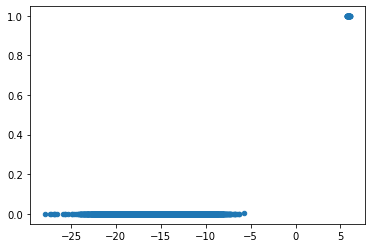

In [176]:
linear_fit = ( np.dot(X_test, lr.coef_.T).flatten() + lr.intercept_ )

plt.scatter(linear_fit, sigmoid(linear_fit), s = 20)
plt.show()

In [177]:
y_pred = lr.predict(X_test)
print("Acurácia do modelo:", balanced_accuracy_score(y_test, y_pred))

Acurácia do modelo: 1.0


Para a primeira aplicação temos uma acurácia de $100\%$. De fato esse resultado é esperado, uma vez que simplesmente construímos ambas as bases identicamente, sem o uso de um ruído, tornando a tarefa de classificação bem fácil para o modelo. Vejamos os resultados quando acrescentamos ruídos nos dados.

In [32]:
# Lê os dados dos municípios brasileiros
f = open("../../municipios_brasil.txt", "r")
municipios = []
UFs = []
for line in f.readlines():
    municipios.append( line.replace("\n","")[:-5] )
    UFs.append( line[-4:-2] )

def get_random_municipio():
    j = np.random.choice(np.arange(len(municipios)))
    return (municipios[j], UFs[j])

In [33]:
get_random_municipio()

('Quiterianópolis', 'CE')

In [34]:
chars = list("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ ")

def add_noise_str(_str, noise_rate):
    n = len(_str)
    noise_index = np.random.choice(np.arange(n), np.random.binomial(n, noise_rate), replace = False)
    
    _str = np.array(list(_str))
    _str[noise_index] = np.random.choice(chars, len(noise_index))
    _str = "".join(_str)
    
    return _str

In [35]:
# --- Carregamento e preparo para a geração do sobrenome... ---
surnames = pd.read_csv("../../MostCommonSurnames.csv", encoding = "latin1", header = None).iloc[:,1:]
surnames.columns = ["sobrenome", "frequencia", "proporcao"]

surnames_prop = []
for j in range(surnames.shape[0]):
    surnames_prop.append( 1/float(surnames.loc[j,"proporcao"].split(":")[1].replace(",",".")) )
surnames.proporcao = surnames_prop/np.sum(surnames_prop)

def add_noise(df, noise_rate = 0.2):
    '''
        Adiciona um ruído aos dados, que pode envolver a remoção do sobrenome, mudança de caracteres aleatória nas variáveis
        de texto, soma de datas e quantidades numéricas etc.
    '''
    # Remove o número na frente dos nomes das colunas
    
    colnames = df.columns
    df = df.copy()
    df.columns = df.columns.str[:-1]
    
    faker = Faker(["pt-BR"])
    
    prob_mudar_nome = noise_rate
    prob_mudar_nome_mae = noise_rate
    
    prob_mudar_municipio = noise_rate
    prob_ruido_aleatorio = noise_rate
    
    prob_mudar_sexo = noise_rate/10
    prob_mudar_raca = noise_rate/2
    
    prob_mudar_date = noise_rate
    
    prob_mudar_endereco = noise_rate
    # Percorre as observações da tabela uma a uma
    for i in range(df.shape[0]):
        
        if(np.random.random() < prob_mudar_nome):
            # print(df.loc[i, "NM_PACIENT"])
            complete_name = str(df.loc[i, "NM_PACIENT"]).split()
            name = complete_name[0]
            surname = " ".join(complete_name[1:])
            surname = Paciente.modify_surname(surnames.sobrenome, surnames.proporcao, surname)
            surname = add_noise_str(surname, noise_rate)
            name = add_noise_str(name, noise_rate)
            df.loc[i, "NM_PACIENT"] = name +" "+ surname
        if(np.random.random() < prob_mudar_nome_mae):
            # print(df.loc[i, "NM_MAE_PAC"])
            complete_name = str(df.loc[i, "NM_MAE_PAC"]).split()
            name = complete_name[0]
            surname = " ".join(complete_name[1:])
            surname = Paciente.modify_surname(surnames.sobrenome, surnames.proporcao, surname)
            surname = add_noise_str(surname, noise_rate)
            name = add_noise_str(name, noise_rate)
            df.loc[i, "NM_MAE_PAC"] = name +" "+ surname
        # noise_rate de chance do indivíduo mudar de municípipio
        if(np.random.random() < prob_mudar_municipio):
            municipio, UF = get_random_municipio()
            df.loc[i, "ID_MUNICIP"] = municipio
            df.loc[i, "SG_UF_NOT"] = UF
        # Adiciona ruídos aleatórios nos caracteres do município
        elif(np.random.random() < prob_mudar_municipio):
            df.loc[i,"ID_MUNICIP"] = add_noise_str(df.loc[i,"ID_MUNICIP"], noise_rate)
        if(np.random.random() < prob_mudar_sexo):
            df.loc[i,"CS_SEXO"] = np.random.choice([1, 2, 9])
        if(np.random.random() < prob_mudar_raca):
            df.loc[i,"CS_RACA"] = np.random.choice([1,2,3,4,5,9], p=[0.327,0.084,0.006,0.378,0.005,0.20])
        if(np.random.random() < prob_mudar_endereco):
            df.loc[i,"NM_LOGRADO"] = faker.street_name()
            df.loc[i,"NM_BAIRRO"] = faker.bairro()
            df.loc[i,"NU_NUMERO"] = faker.building_number()
            complemento = np.random.choice(["", "apt", "bloco", "casa"], p = [0.55, 0.3, 0.1, 0.05])
            if(complemento == "apt"):
                df.loc[i,"NM_COMPLEM"] = "APT "+ str(np.random.randint(130))
            elif(complemento == "bloco"):
                df.loc[i,"NM_COMPLEM"] = "BLOCO "+ str(np.random.randint(16))
            elif(complemento == "casa"):
                df.loc[i,"NM_COMPLEM"] = "casa "+ np.random.choice(["preta", "amarela", "azul", "verde"])
        if(np.random.random() < prob_mudar_date):
            df.loc[i,"DT_NASC"] = df.loc[i,"DT_NASC"] + timedelta(days = np.random.normal(0, scale = 2000*noise_rate))
    # Retorna a base de dados alterada
    df.columns = colnames
    return df

# Modelo de Classificação com Ruído

Para aproximarmos o treinamento do modelo a um cenário real podemos considerar funções de ruído aplicadas aos dados, de modo que as distâncias entre um mesmo indivíduo em duas bases diferentes sejam diferentes de um. Ou seja, mesmo que se trate da mesma pessoa a distância é não nula.

As funções de ruído são relativamente arbitrárias e podem ser customizadas por probabilidades dentro do código.

In [86]:
df_noise = add_noise(df, noise_rate = 0.1)
df2_noise = add_noise(df2, noise_rate = 0.2)

In [87]:
df2_noise

,Índice2,TEM_CPF2,NU_CPF2,TEM_CNS2,NU_CNS2,NM_PACIENT2,NM_MAE_PAC2,DT_NASC2,CS_SEXO2,CS_RACA2,SG_UF_NOT2,ID_MUNICIP2,NM_LOGRADO2,NU_NUMERO2,NM_BAIRRO2,NM_COMPLEM2
0,189.0,False,None,False,None,Aparecida Trindade Fontes Pontes Mariano,Maria Trindade Fontes,1965-07-15 00:00:00.000000,2,9,ES,Mimoso do Sul,Largo de da Mota,118,Conjunto Serra Verde,BLOCO 5
1,90.0,False,None,False,None,Carlos Galvao,Maria Galvao,1954-07-20 00:00:00.000000,1,2,MT,Várzea Grande,Passarela de Peixoto,4,Mineirão,
2,88.0,False,None,False,None,Francisco Rabello,Ana RabeXloVSoaBes dt SidYl,1929-12-31 00:00:00.000000,1,9,SC,União do Oeste,Ladeira Luna Barbosa,30,Ademar Maldonado,
3,148.0,False,None,False,None,Daniel de Siqueira de Jesus da Silva,Ana darnilva,1989-05-07 00:00:00.000000,9,1,PR,Iguaraçu,Chácara de Pereira,8,Penha,BLOCO 7
4,183.0,False,None,False,None,Maria Matos,Adriana Matos Arruda,1927-09-26 00:00:00.000000,1,4,GO,SMoLJoão da Paraúna,Alameda de Freitas,61,Alípio De Melo,APT 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,False,None,False,None,Angela Pessoa Borba,Maria,1983-02-02 00:00:00.000000,2,4,BA,Ponto Novo,Colônia de Porto,5,Conjunto Lagoa,
296,NaN,False,None,False,None,Wilson Mariano Calixto,Cristiane Veloso,1941-02-13 00:00:00.000000,1,4,RS,Selbach,Avenida Paulo Azevedo,45,Belvedere,APT 24
297,NaN,False,None,False,None,Sebastiao Marcelino Neres da Gloria,Ana Neres da Gloria,1954-11-04 03:03:06.941146,9,4,MG,Nova União,Recanto Alves,8,Bonfim,
298,NaN,False,None,False,None,Darci Lemos,MaIra Lfmss,1992-12-25 00:00:00.000000,9,4,MA,Buriti Bravo,Via Nina Sales,27,Conjunto Santa Maria,


In [88]:
rows = []
for i in range(df_noise.shape[0]):
    for j in range(df2_noise.shape[0]):
        paired = np.concatenate([list(df_noise.iloc[i,:]),
                                 list(df2_noise.iloc[j,:]),
                                 [1 if(df_noise.iloc[i,0] == df2_noise.iloc[j,0]) else 0]])
        rows.append(paired)
df_paired2 = pd.DataFrame(rows)
df_paired2.columns = np.concatenate([df_noise.columns, df2_noise.columns, ["same"]])
df_paired2.drop(columns = ["TEM_CPF1","NU_CPF1","TEM_CNS1","NU_CNS1",
                          "TEM_CPF2","NU_CPF2","TEM_CNS2","NU_CNS2"], inplace = True)
df_paired2.head(4)

,Índice1,NM_PACIENT1,NM_MAE_PAC1,DT_NASC1,CS_SEXO1,CS_RACA1,SG_UF_NOT1,ID_MUNICIP1,NM_LOGRADO1,NU_NUMERO1,...,DT_NASC2,CS_SEXO2,CS_RACA2,SG_UF_NOT2,ID_MUNICIP2,NM_LOGRADO2,NU_NUMERO2,NM_BAIRRO2,NM_COMPLEM2,same
0,0,Maria Ramires,Rita Ramires,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1965-07-15,2,9,ES,Mimoso do Sul,Largo de da Mota,118,Conjunto Serra Verde,BLOCO 5,0
1,0,Maria Ramires,Rita Ramires,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1954-07-20,1,2,MT,Várzea Grande,Passarela de Peixoto,4,Mineirão,,0
2,0,Maria Ramires,Rita Ramires,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1929-12-31,1,9,SC,União do Oeste,Ladeira Luna Barbosa,30,Ademar Maldonado,,0
3,0,Maria Ramires,Rita Ramires,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1989-05-07,9,1,PR,Iguaraçu,Chácara de Pereira,8,Penha,BLOCO 7,0


In [89]:
X2, y2 = get_metrics(df_paired2)
X2 = pd.get_dummies(X2)

In [90]:
X2.loc[y2 == 1,:]

,Índice1,Índice2,Nome,NomeMae,DtNasc,UF,Municipio,Logradouro,Numero,Bairro,...,Raca1_3,Raca1_4,Raca1_5,Raca1_9,Raca2_1,Raca2_2,Raca2_3,Raca2_4,Raca2_5,Raca2_9
99,0,0.0,0,18,0,1,6,12,1,12,...,0,0,0,0,1,0,0,0,0,0
312,1,1.0,0,0,0,0,0,16,1,11,...,0,0,0,1,0,0,0,0,0,1
918,3,3.0,16,0,110,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1234,4,4.0,16,0,459,0,0,18,2,11,...,0,0,0,0,1,0,0,0,0,0
1655,5,5.0,4,8,106,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72461,241,241.0,17,5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
72623,242,242.0,1,0,0,0,0,16,3,7,...,0,0,0,1,0,0,0,0,0,1
73005,243,243.0,0,0,276,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
73373,244,244.0,0,1,0,0,0,16,2,9,...,0,0,0,0,1,0,0,0,0,0


In [91]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2.iloc[:,2:], y2, train_size = 0.8, stratify = y2)

sc2 = StandardScaler()
X_train2.iloc[:,:9] = sc2.fit_transform(X_train2.iloc[:,:9])
X_test2.iloc[:,:9] = sc2.transform(X_test2.iloc[:,:9])

In [92]:
lr2 = LogisticRegression()
lr2.fit(X_train2, y_train2)

LogisticRegression()

In [93]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

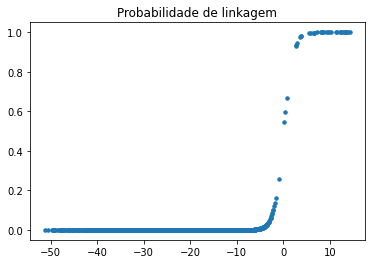

In [97]:
linear_fit2 = ( np.dot(X_test2, lr2.coef_.T).flatten() + lr2.intercept_ )

plt.scatter(linear_fit2, sigmoid(linear_fit2), s = 12)
plt.title("Probabilidade de linkagem")
plt.show()

In [95]:
print("Acurácia do modelo:", balanced_accuracy_score(y_test2, lr2.predict(X_test2)))

Acurácia do modelo: 0.9625


In [96]:
y_pred2 = lr2.predict(X_test2)
np.mean(y_pred2 == y_test2)

0.9998

Vemos que o modelo obteve uma acurácia bem alta, mesmo após considerar observações ruidosas no conjunto de dados. Esse modelo mostra um forte potencial e pode ser adaptável a bases com dados faltantes. Como ideia futura do projeto seria interessante compararmos o desempenho desse e outros modelos.

Um material interessante a ser analisado quanto a modelagem se dá em https://docs.lib.purdue.edu/cgi/viewcontent.cgi?article=2572&context=cstech.

Seria interessante a aplicação desse modelo, com os coeficientes já treinados, em uma base de dados real, com informações pessoais dos indivíduos. Vale destacarmos que foi feito todo o processo de simulação da base devido à não divulgação de informações sensíveis dos pacientes do SUS.

## Conteúdo de exemplificação - Funcionamento do site

In [99]:
df_paired.columns

Index(['Índice1', 'NM_PACIENT1', 'NM_MAE_PAC1', 'DT_NASC1', 'CS_SEXO1',
       'CS_RACA1', 'SG_UF_NOT1', 'ID_MUNICIP1', 'NM_LOGRADO1', 'NU_NUMERO1',
       'NM_BAIRRO1', 'NM_COMPLEM1', 'Índice2', 'NM_PACIENT2', 'NM_MAE_PAC2',
       'DT_NASC2', 'CS_SEXO2', 'CS_RACA2', 'SG_UF_NOT2', 'ID_MUNICIP2',
       'NM_LOGRADO2', 'NU_NUMERO2', 'NM_BAIRRO2', 'NM_COMPLEM2', 'same'],
      dtype='object')

In [289]:
X_save = X.copy()
X_save.iloc[:,2:11] = sc.transform(X.iloc[:,2:11])
X_save = X_save.iloc[:,2:]

df_paired["PROB"] = np.round(lr.predict_proba(X_save)[:,1], 6)
df_paired_to_save = df_paired.loc[:,["NM_PACIENT1", "NM_MAE_PAC1", "NM_PACIENT2",  "NM_MAE_PAC2",
                 "SG_UF_NOT1", "SG_UF_NOT2", "PROB"]]
df_paired_to_save.columns = ["Nome 1", "Nome da Mãe 1", "Nome 2", "Nome da Mãe 2", "Estado 1", "Estado 2", "Probabilidade linkage"]

In [294]:
casos_link = df_paired_to_save.loc[y == 1,:]
casos_sem_link = df_paired_to_save.loc[y == 0,:]

n_obs = 20
df_paired_to_save = pd.concat([casos_link.iloc[:n_obs,:], casos_sem_link.iloc[:n_obs,:]])
df_paired_to_save = df_paired_to_save.sample(frac = 1)

In [291]:
df_paired_to_save.to_csv("df_paired_site.csv")

In [283]:
caso_especifico = df_paired.iloc[0:2,:].copy()
caso_especifico["NM_PACIENT1"] = "Patrícia Cardoso de Melo"
caso_especifico["NM_PACIENT2"] = "Patrícia Fragoso Garnelo"
caso_especifico["NM_MAE_PAC1"] = "Maria Rita Cardoso"
caso_especifico["NM_MAE_PAC2"] = "Maria Lucia Fragoso"

In [284]:
caso_especifico

,Índice1,NM_PACIENT1,NM_MAE_PAC1,DT_NASC1,CS_SEXO1,CS_RACA1,SG_UF_NOT1,ID_MUNICIP1,NM_LOGRADO1,NU_NUMERO1,...,CS_SEXO2,CS_RACA2,SG_UF_NOT2,ID_MUNICIP2,NM_LOGRADO2,NU_NUMERO2,NM_BAIRRO2,NM_COMPLEM2,same,PROB
0,0,Patrícia Cardoso de Melo,Maria Rita Cardoso,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,2,9,PR,Nova Santa Rosa,Largo de da Mota,118,Conjunto Serra Verde,BLOCO 5,0,0.000000
1,0,Patrícia Cardoso de Melo,Maria Rita Cardoso,1951-06-04,2,1,PE,Cupira,Colônia de Lima,79,...,1,2,SE,Cedro de São João,Passarela de Peixoto,4,Mineirão,,0,0.000002
